In [1]:
from matplotlib import pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from imblearn.over_sampling import SMOTENC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from collections import Counter
from sklearn import ensemble
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style('white')

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


This is a classifier problem where we are trying to classify Fraud or no Fraud based on predictor variables. Some algorithms that do well here are Naive Bayes classifier, KNN and Logistic Classifier.

In [3]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Lot of class imbalance. One way to overcome this problem is by undersampling the majority class and synthetic oversampling the minority class.i.e SMOTE

Before trying all models, that let us first solve class imbalance problem.

In [4]:
Y=df.Class.sample(frac=0.1, replace=True, random_state=1)
X=df.loc[:, ~(df.columns).isin(['Class'])].sample(frac=0.1, replace=True, random_state=1)

# SMOTE i.e oversampling and undersampling
smote_nc = SMOTENC(categorical_features=[29], random_state=0)
X, Y = smote_nc.fit_resample(X, Y)

In [5]:
print('Resampled dataset samples per each class\n {}'.format(Counter(Y)))

Resampled dataset samples per each class
 Counter({0: 28433, 1: 28433})


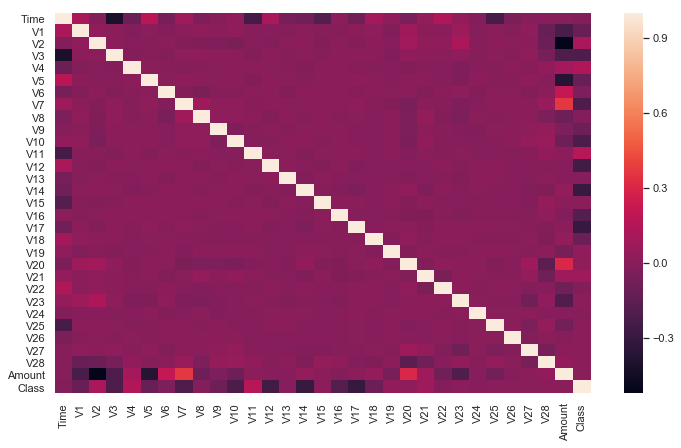

In [6]:
df1=df.sample(frac=0.1, replace=True, random_state=1)

# Heatmap
sns.set(rc={'figure.figsize':(12,7)})
sns.heatmap(df1.corr())
plt.show()

The heat map shows that there is very less or no correlation between all the PCA components which is expected and shows they are independent variables.

The outcome varibale class however shows varied correlation with predicted variables.

In [7]:
#Data split to Train and test
global X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

def model(mod):
    model_object=mod
    model_object.fit(X_train, y_train)
    evaluation(model_object)
    return model_object

def evaluation(model_object):
    #Evalution of model
    score=cross_val_score(X=X_test, y=y_test, estimator=model_object, cv=10)
    print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

    y_pred=model_object.predict(X_test)
    conf_mat=confusion_matrix(y_test, y_pred)
    print (conf_mat)
    print ('The sensitivity i.e true positives is {0:2f}% '.format((conf_mat[1,1]/(conf_mat[1,1]+conf_mat[1,0]))*100))
    print ('The specificity i.e true negatives is {0:2f}% '.format((conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1]))*100))
    print ('The Type I error i.e. false negatives is {0:2f}% '.format((conf_mat[1,0]/(conf_mat[1,0]+conf_mat[0,0]))*100))
    print ('The Type II error i.e. false positives is {0:2f}% '.format((conf_mat[0,1]/(conf_mat[0,1]+conf_mat[1,1]))*100))
    return

### Naives Bayes Classifier

In [8]:
model(BernoulliNB())

Accuracy: 0.96 (+/- 0.01)
[[9442   27]
 [ 735 8562]]
The sensitivity i.e true positives is 92.094224% 
The specificity i.e true negatives is 99.714859% 
The Type I error i.e. false negatives is 7.222168% 
The Type II error i.e. false positives is 0.314356% 


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Even though the accuracy here is correct. We care more about the False Negatives i.e. Type II error or Fraud activity being ignored as Non fraudulent (False Negative)...which is often very expensive for the businness...so this parameter should be as minimum or Zero %.

### kNN Classifier

In [9]:
model(neighbors.KNeighborsClassifier(n_neighbors=10))

Accuracy: 0.83 (+/- 0.01)
[[8205 1264]
 [1366 7931]]
The sensitivity i.e true positives is 85.307088% 
The specificity i.e true negatives is 86.651178% 
The Type I error i.e. false negatives is 14.272281% 
The Type II error i.e. false positives is 13.746601% 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

### Vanilla Logistic Regression

In [10]:
model(LogisticRegression(C=1e9))

C:\Users\nagad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nagad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nagad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nagad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nagad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy: 0.98 (+/- 0.01)
[[9315  154]
 [ 163 9134]]
The sensitivity i.e true positives is 98.246746% 
The specificity i.e true negatives is 98.373640% 
The Type I error i.e. false negatives is 1.719772% 
The Type II error i.e. false positives is 1.658053% 


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

### Random Forest Classifier

In [11]:
model(ensemble.RandomForestClassifier())

C:\Users\nagad\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 1.00 (+/- 0.00)
[[9467    2]
 [   0 9297]]
The sensitivity i.e true positives is 100.000000% 
The specificity i.e true negatives is 99.978878% 
The Type I error i.e. false negatives is 0.000000% 
The Type II error i.e. false positives is 0.021508% 


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Gradient Boost Classifier

In [12]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}
model(ensemble.GradientBoostingClassifier(**params))

Accuracy: 1.00 (+/- 0.00)
[[9464    5]
 [   0 9297]]
The sensitivity i.e true positives is 100.000000% 
The specificity i.e true negatives is 99.947196% 
The Type I error i.e. false negatives is 0.000000% 
The Type II error i.e. false positives is 0.053752% 


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

The models which performed better in terms of both the accuracy and error rate especailly, lower false negatives rate are
Random Forest==Gradient Boost Classifier > Vanilla Logistic Regression > Naive Bayes > knn Classifier